## Radius vs time
Here we plot the radius dependence for all phases with respect to time. We use reference values taking as references previus estimations of mass loss and mass transfer, terminal velocities from literature of AGB winds and values values for our typical systems. (RS Oph and TCrB)
$E_0= 10^{43}erg$, $v_{\infty}=10 km/s$ y $\dot M_{*}= 1\times 10^{-7}M_{\odot}/yr$\\

To compute all phases we need the times between them $t_{dec}$, $t_c$ and also we will need the radius and velocity after phase 2 $R_{tc}$ and $v_{tc}$

with: $$ t_{dec} \simeq \frac{M_0v_{\infty}}{\dot M_*v_0}$$
and
$$t_c\simeq t_{dec}\left(\frac{v_0}{v_{sh,c}} \right)^3 $$



In [121]:
import numpy as np 
import matplotlib.pyplot as plt 

#datos generales
M_sun= 1.989 * 1E33       # en g
yr_sec= 60*60*24*365
seg_d= 60*60*24           # segundos en un día


#E0= 7*1E43         #ergs
v_wind=  10*1E5  # en cm/s
Mdot= 9E-8 *M_sun/yr_sec # en g/s
v0= 3000*1E5       # en cm/s
M0= 1E-6 *M_sun   
E0= (1/2)*M0*v0**2

a= (6*E0*v_wind/Mdot)**(1/3)
t_dec= M0*v_wind/(Mdot*v0)   # en s
t_dec_dias= t_dec/seg_d   # en días 


# hay un problema que si cambiamos E0 para fitear R se nod daña para V0
#pero lo más cpoherente es que R sea continuo, y que la velocidad si tenga una especie de salto
#por lo tanto despejamos a de la condiión necesaria
R_tdec= v0*t_dec
a= R_tdec/t_dec**(2/3)



#fase I
tI= np.linspace(0,int(t_dec),int(t_dec)+1)
RI= tI*v0
vI= v0
print('duración de la fase 1: ',int(t_dec_dias),'dias')


duración de la fase 1:  13 dias


In [122]:
print(E0,a)

8.9505e+43 31593824569.028637


In [123]:
#fase 2
v_shc= 1.7*1E8    #cm/s
tc= t_dec*(v0/v_shc)**3
tc_dias= tc/seg_d
print('duración de la fase 2:',int(tc_dias),'dias desde el inicio de la explosión')
print('y dura approx',int(tc_dias-t_dec_dias),' dias por sí mima')

tII= np.linspace(t_dec, int(tc),int(tc)+1)
RII= a*tII**(2/3)
vII= (2/3)*a*tII**(-1/3) 

duración de la fase 2: 74 dias desde el inicio de la explosión
y dura approx 60  dias por sí mima


C:\Users\paisa\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\paisa\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


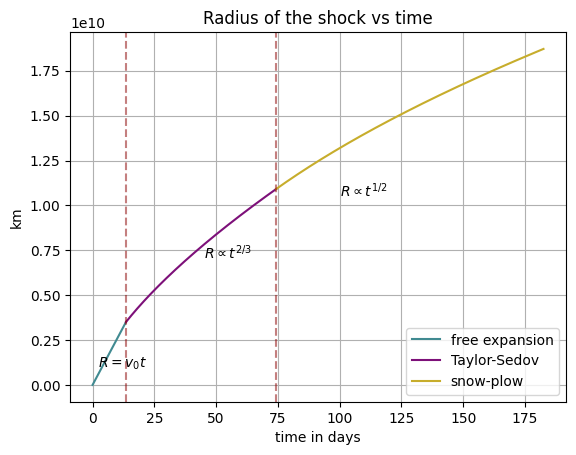

In [124]:
#fase 3
tIII= np.linspace(int(tc), int(0.5*yr_sec),int(0.5*yr_sec))
Rtc= a*tc**(2/3)
vtc= (2/3)*a*tc**(-1/3) 

tau= Rtc/(2*vtc)

RIII= Rtc*(1+(tIII-tc)/tau)**(1/2)
vIII= vtc*(1+(tIII-tc)/tau)**(-1/2)

R_tdec= v0*t_dec

#Ploteamos las 3 fases para el radio
plt.title('Radius of the shock vs time')
plt.plot(tI/seg_d,RI/1E5, label='free expansion',color="#408a91")
plt.plot(tII/seg_d,RII/1E5, label='Taylor-Sedov',color="#7d1079")
plt.plot(tIII/seg_d,RIII/1E5, label='snow-plow',color="#C7AD2C")
plt.xlabel('time in days')
plt.ylabel('km')
plt.text(2, 0.1*1E10 ,r'$R= v_0t$')
plt.text(45, 0.7*1E10 ,r'$R \propto t^{2/3}$')
plt.text(100, 1.05*1E10 ,r'$R \propto t^{1/2}$')

#plt.axhline(R_tdec/1E5)

plt.axvline(t_dec/seg_d,color='darkred',ls='dashed',alpha=0.5)
plt.axvline(tc/seg_d,color='darkred',ls='dashed',alpha=0.5)
#plt.xlim(0,100*seg_d)
plt.legend()
plt.grid('on')

## Now velocities
phase I $v_{sh}=v_0$,

 phase II $$v_{sh}= \frac{2}{3}at^{-1/3} $$

and phase III $$v_{sh}= v_{tv}\left( 1+ \frac{t-t_c}{\tau}\right) ^{-1/2}$$

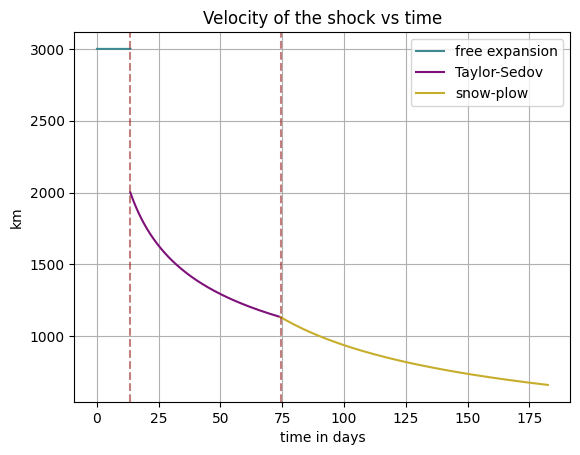

In [125]:
vI= np.full(tI.shape, v0)




#Ploteamos las 3 fases para las velocidades
plt.title('Velocity of the shock vs time')
plt.plot(tI/seg_d,vI/1E5, label='free expansion',color="#408a91")
plt.plot(tII/seg_d,vII/1E5, label='Taylor-Sedov',color="#7d1079")
plt.plot(tIII/seg_d,vIII/1E5, label='snow-plow',color="#C7AD2C")
plt.xlabel('time in days')
plt.ylabel('km')
#plt.text(2, 0.1*1E10 ,r'$R= v_0t$')
#plt.text(45, 0.7*1E10 ,r'$R \propto t^{2/3}$')
#plt.text(100, 1.05*1E10 ,r'$R \propto t^{1/2}$')


plt.axvline(t_dec/seg_d,color='darkred',ls='dashed',alpha=0.5)
plt.axvline(tc/seg_d,color='darkred',ls='dashed',alpha=0.5)
#plt.xlim(-1,150)
plt.legend()
plt.grid('on')